In this notebook we make the analysis of the probabilities outputed with pyUPMASK.

In [2]:
import numpy as np
import pandas as pd
from astropy.io import ascii
import os
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from cluster_tools import corr_plx, quality_filter, movprop_filter, quality2_filter
import cmasher as cmr

In [3]:
data = ascii.read("catalogue_ngc1027.csv")
data_pyupmask = ascii.read("pyUPMASK/output/ngc1027_pyupmask.csv")

In [4]:
len(data)

602

In [5]:
data.add_column(data_pyupmask["probs_final"]) 

In [6]:
data

RA_ICRS,DE_ICRS,Source,e_RA_ICRS,e_DE_ICRS,Plx,e_Plx,PM_1,pmRA,e_pmRA,pmDE,e_pmDE,Solved,nueff,pscol,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,e_RV,ELAT,RAJ2000,DEJ2000,phot_bp_rp_excess_factor_2a,phot_bp_rp_excess_factor_corr,Plx_corr,probs_final
float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
41.102154,60.751884,464819605794855552,0.0559,0.0676,0.616,0.1034,2.402,-1.443,0.091,1.92,0.091,31,1.388,0.0,1.006,17.73438,18.559717,16.872322,1.687395,0.0,0.0,42.279453,41.102165,60.751877,1.2702895,-0.023056831,0.644894,0.0
40.93392,60.707798,464819915032423680,0.0771,0.0915,0.9722,0.1337,2.303,-1.492,0.13,1.755,0.127,31,1.332,0.0,1.032,18.265734,19.336851,17.237455,2.099396,0.0,0.0,42.272522,40.933933,60.70779,1.3556436,0.006881025,0.997428,0.0
41.971367,60.869427,464833766309733248,0.008,0.0088,0.8965,0.0135,2.625,-1.53,0.013,2.133,0.012,31,1.545,0.0,0.97,13.546622,13.889764,13.031779,0.857985,0.0,0.0,42.21656,41.971382,60.869415,1.2050198,0.00063459,0.9302309999999999,0.0007
41.65688,60.831924,464835445634360960,0.0838,0.091,0.5969,0.1512,2.42,-1.698,0.137,1.724,0.119,31,1.331,0.0,0.971,18.286827,19.312056,17.303177,2.008879,0.0,0.0,42.243526,41.656895,60.831917,1.3236139,-0.012531909,0.621899,0.0031
41.851685,60.892326,464836652527754368,0.0082,0.0091,0.9197,0.0136,2.608,-1.809,0.013,1.878,0.012,31,1.54,0.0,1.006,12.826741,13.18269,12.293089,0.889601,0.0,0.0,42.260834,41.8517,60.89232,1.2106379,0.0035945917,0.941174,0.0
41.83839,60.91178,464837408441994624,0.0172,0.0211,0.6646,0.0313,3.204,-2.082,0.028,2.435,0.028,31,1.403,0.0,0.971,15.608692,16.358255,14.755588,1.602668,0.0,0.0,42.281254,41.83841,60.911774,1.2871526,0.0044630626,0.698924,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40.610764,62.316387,465994056012322816,0.1005,0.1224,0.7535,0.1611,3.276,-2.183,0.157,2.443,0.162,95,0.0,1.3367,0.998,18.705412,19.557,17.71741,1.83959,0.0,0.0,43.801617,40.610786,62.316376,1.3767202,0.06354248,0.7787569999999999,0.0002
40.35213,62.384457,465997118335548672,0.0113,0.0147,0.96,0.0199,2.535,-1.906,0.019,1.672,0.021,95,0.0,1.5934,1.245,11.635002,11.86583,11.239923,0.625908,0.0,0.0,43.913765,40.35215,62.38445,1.1920058,0.004971739,0.9956229999999999,0.0


In [7]:
RA = data["RAJ2000"]
DE = data["DEJ2000"]
pmra = data["pmRA"]
pmde = data["pmDE"]
plx = data["Plx"]
gmag = data["Gmag"]
bprp = data["BP-RP"]
probs = data["probs_final"]

In [14]:
#kk,= np.where(plx>0.7)

## RA,DEC

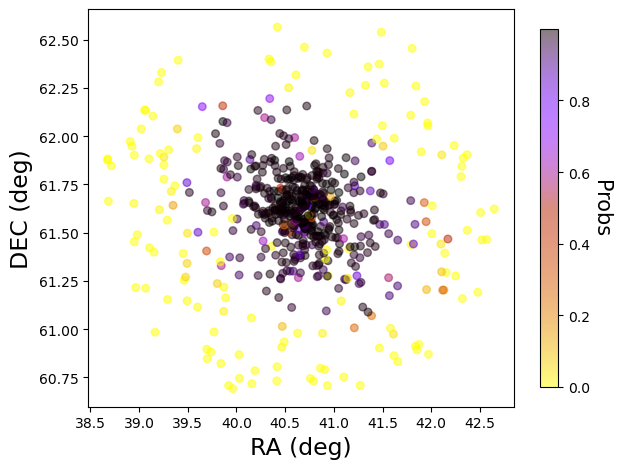

In [21]:
%matplotlib inline
fig,ax1 = plt.subplots(tight_layout=True)

img = ax1.scatter(RA, DE , c=probs, cmap="gnuplot_r",alpha=0.5,s=30)
ax1.set_ylabel("DEC (deg)",fontsize=17)
ax1.set_xlabel("RA (deg)",fontsize=17)
#ax1.set_title("Position of the clusters in the Galaxy")
cbar = plt.colorbar(img,orientation="vertical",shrink=0.9)
cbar.set_label("Probs",fontsize=15,rotation=270, labelpad=15)
#plt.savefig("dist4_galaxy.png", dpi=150)


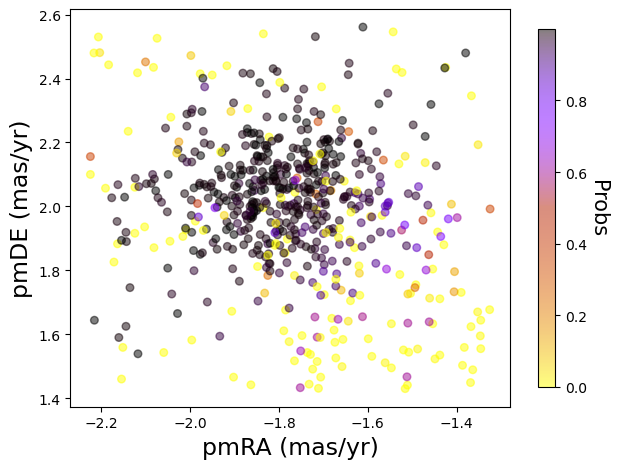

In [22]:
%matplotlib inline
fig,ax1 = plt.subplots(tight_layout=True)

img = ax1.scatter(pmra, pmde , c=probs, cmap="gnuplot_r",alpha=0.5,s=30)
ax1.set_xlabel("pmRA (mas/yr)",fontsize=17)
ax1.set_ylabel("pmDE (mas/yr)",fontsize=17)
#ax1.set_title("Position of the clusters in the Galaxy")
cbar = plt.colorbar(img,orientation="vertical",shrink=0.9)
cbar.set_label("Probs",fontsize=15,rotation=270, labelpad=15)
#plt.savefig("dist4_galaxy.png", dpi=150)


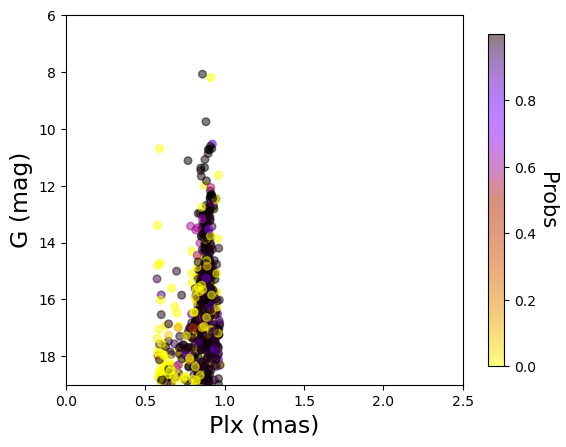

In [23]:
fig, ax = plt.subplots()
img=ax.scatter(plx, gmag, c=probs, cmap="gnuplot_r",alpha=0.5,s=30)
ax.set_ylabel("G (mag)",fontsize=17)
ax.set_xlabel("Plx (mas)",fontsize=17)
ax.set_ylim(19,6)
ax.set_xlim(0.,2.5)
cbar = plt.colorbar(img,orientation="vertical",shrink=0.9)
cbar.set_label("Probs",fontsize=15,rotation=270, labelpad=15)

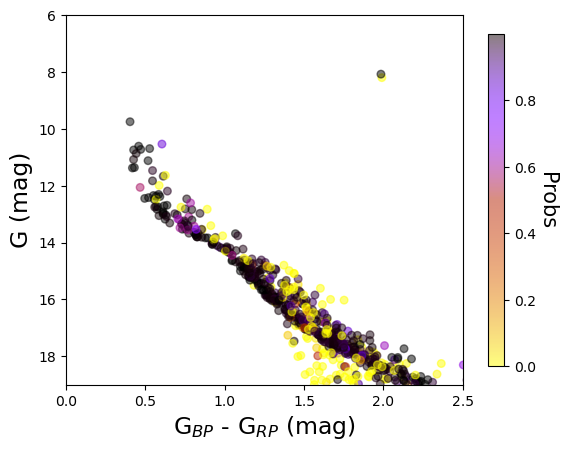

In [24]:
fig, ax = plt.subplots()
img=ax.scatter(bprp, gmag, c=probs, cmap="gnuplot_r",alpha=0.5,s=30)
ax.set_ylabel("G (mag)",fontsize=17)
ax.set_xlabel(r"G$_{BP}$ - G$_{RP}$ (mag)",fontsize=17)
ax.set_ylim(19,6)
ax.set_xlim(0,2.5)
cbar = plt.colorbar(img,orientation="vertical",shrink=0.9)
cbar.set_label("Probs",fontsize=15,rotation=270, labelpad=15)